In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aishuej/dataset/main/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

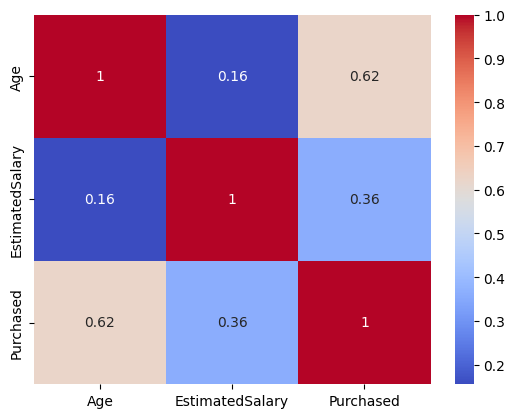

In [ ]:
sns.heatmap(df[["Age","EstimatedSalary","Purchased"]].corr(),annot=True,cmap="coolwarm")

In [ ]:
df1=df.drop_duplicates()

In [ ]:
df1=pd.get_dummies(df1,drop_first=False)

<Axes: xlabel='Purchased', ylabel='count'>

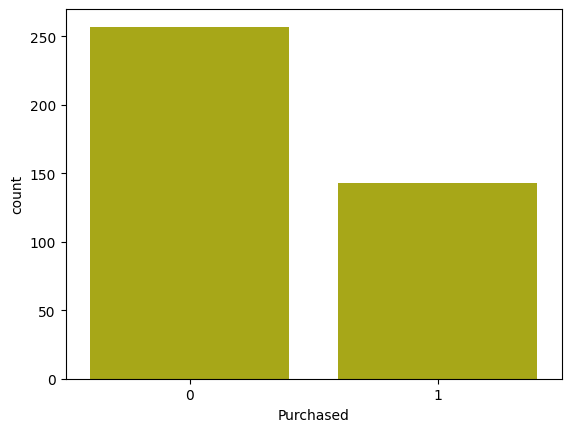

In [ ]:
sns.countplot(x="Purchased",data=df1,color="y")

In [ ]:
x=df1.drop("Purchased",axis=1)
y=df1["Purchased"]
#split the dataset into tarain and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#standardize the features using standardscaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#creat logistics regrestion model
model=LogisticRegression()

#train the model on train set
model.fit(x_train_scaled,y_train)

#make prediction on the testing  set
y_pred=model.predict(x_test_scaled)

#evalute the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print("accuracy:",accuracy)
print("conf_matrix:",conf_matrix)
print("classification:",classification)
print("classification",classification)

accuracy: 0.8875
conf_matrix: [[50  2]
 [ 7 21]]
classification:               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

classification               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

